In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import requests
import math
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [3]:
import os

### Data Cleaning

In [4]:
# step 1: pull the CSV files into separate DataFrames and store them in a dictionary
stocks_dict = {}
stocks_path = "C:/Users/pola_/OneDrive/Documents/Cesar/Data-bootcamp-UoT/Lessons/week 7/project 1/Stocks2"

for stocknamefile in os.listdir(stocks_path):
    if stocknamefile.endswith('.csv'):
        stock_name = os.path.splitext(stocknamefile)[0]
        stocksdf = pd.read_csv(os.path.join(stocks_path, stocknamefile))
        # Add a new column with the stock name
        stocksdf['Stock Name'] = stock_name
        stocks_dict[stock_name] = stocksdf

# Step 2: Concatenate all DataFrames into a single DataFrame
stocksmerged_df = pd.concat(stocks_dict.values(), ignore_index=True)

# Step 3: Drop the 'Dividends' and 'Stock Splits' columns
stocksmerged_df.drop(columns=['Dividends', 'Stock Splits', 'Adj Close', 'Capital Gains'], inplace=True)

# Save the merged DataFrame to a new CSV file
stocksmerged_df.to_csv('merged_stocks_data.csv', index=False)
stocksmerged_df

,Date,Open,High,Low,Close,Volume,Stock Name
0,2022-03-24 00:00:00-04:00,9.850000,9.850000,9.800000,9.810000,155000,ACAX
1,2022-03-25 00:00:00-04:00,9.800000,9.810000,9.800000,9.800000,175000,ACAX
2,2022-03-28 00:00:00-04:00,9.800000,9.830000,9.800000,9.810000,48900,ACAX
3,2022-03-29 00:00:00-04:00,9.830000,9.830000,9.818000,9.820000,5100,ACAX
4,2022-03-30 00:00:00-04:00,9.920000,9.920000,9.920000,9.920000,1000,ACAX
...,...,...,...,...,...,...,...
100122,2023-05-17 00:00:00-04:00,24.389999,24.660000,24.271000,24.530001,16200,RZB
100123,2023-05-18 00:00:00-04:00,24.500000,24.590000,24.386999,24.530001,8400,RZB
100124,2023-05-19 00:00:00-04:00,24.469999,24.650999,24.180000,24.650999,27500,RZB
100125,2023-05-22 00:00:00-04:00,24.570000,24.639999,24.309999,24.500000,24800,RZB


### Price Change Analysis

In [10]:
# Step 4: Convert 'Date' column to datetime with timezone information
stocksmerged_df['Date'] = pd.to_datetime(stocksmerged_df['Date'], utc=True)

# Step 5: Filter data to only include rows from 2015
stocksmerged_df = stocksmerged_df[stocksmerged_df['Date'].dt.year >= 2015]

# Step 6: Calculate the percentage change in price over time for each stock
stocksmerged_df['Percentage Change'] = stocksmerged_df.groupby('Stock Name')['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Step 7: Create a new DataFrame to store the results
Price_change_df = pd.DataFrame({
    'Stock Name': stocksmerged_df['Stock Name'].unique(),
    'Percentage Change': stocksmerged_df.groupby('Stock Name')['Percentage Change'].last()
})

# Step 8: Sort the stocks based on the percentage change in price
Price_change_df = Price_change_df.sort_values(by='Percentage Change', ascending=False)

# Reset the index of the result DataFrame
Price_change_df.reset_index(drop=True, inplace=True)
Price_change_df

C:\Users\pola_\AppData\Local\Temp\ipykernel_19372\3265190139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocksmerged_df['Date'] = pd.to_datetime(stocksmerged_df['Date'], utc=True)


,Stock Name,Percentage Change
0,AGYS,462.338754
1,REXR,311.610919
2,ACN,273.575198
3,MTH,223.348429
4,ADC,193.910641
5,RIO,156.147239
6,NEWT,134.073412
7,RSSS,131.111109
8,G,113.997628
9,ADX,86.845226


### Creation of the Scatter Plotts and the lineal correlation line and equation.

Equation of the Linear Correlation for AGYS: y = 0.0285x + -3.4178
Future Price of AGYS after one year from 2023-05-23 04:00:00+00:00: 67.26
Difference in Price after one year: -2.47


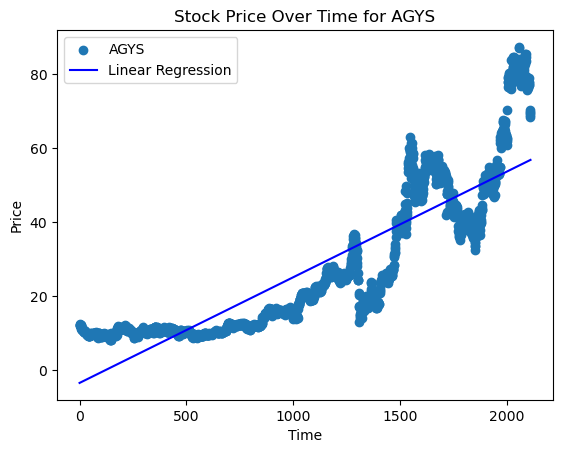

Equation of the Linear Correlation for REXR: y = 0.0278x + 6.8446
Future Price of REXR after one year from 2023-05-23 04:00:00+00:00: 75.82
Difference in Price after one year: 21.64


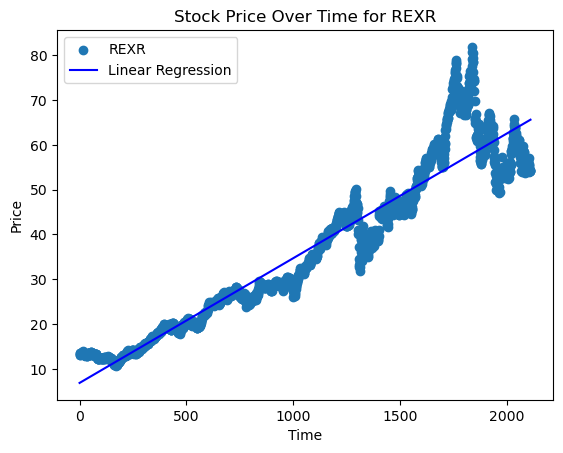

Equation of the Linear Correlation for ACN: y = 0.1252x + 50.6705
Future Price of ACN after one year from 2023-05-23 04:00:00+00:00: 360.89
Difference in Price after one year: 72.79


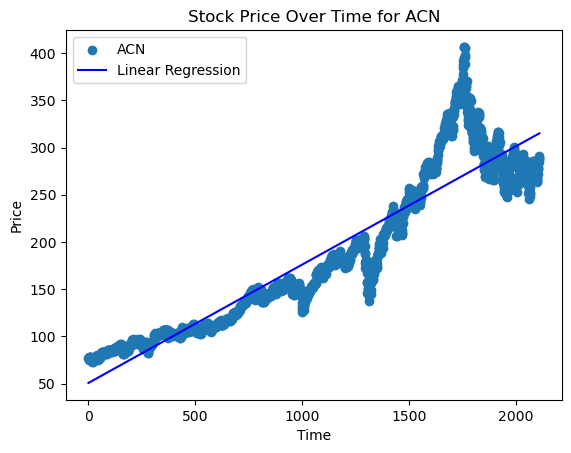

Equation of the Linear Correlation for MTH: y = 0.0378x + 22.5081
Future Price of MTH after one year from 2023-05-23 04:00:00+00:00: 116.12
Difference in Price after one year: 1.08


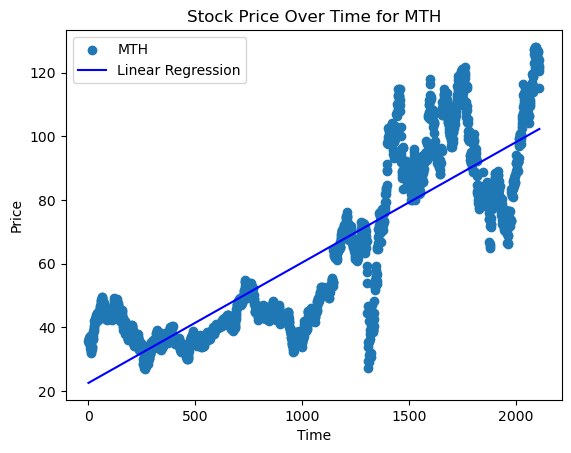

Equation of the Linear Correlation for ADC: y = 0.0250x + 23.1083
Future Price of ADC after one year from 2023-05-23 04:00:00+00:00: 85.02
Difference in Price after one year: 19.71


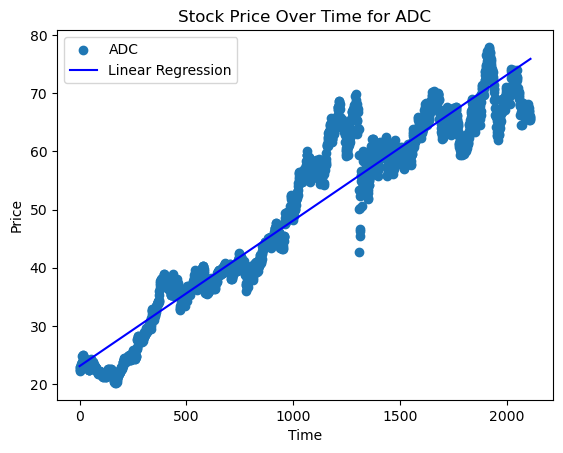

In [6]:
# Step 9: Get the names of the top 5 stocks with the highest percentage change
top_5_stocks = Price_change_df.head(5)['Stock Name'].tolist()

# Step 10: Create scatter plots with linear correlation lines for the top 5 stocks
for stock_name in top_5_stocks:
    stock_data = stocksmerged_df[stocksmerged_df['Stock Name'] == stock_name]
    x = np.arange(len(stock_data))
    y = stock_data['Close']

    plt.scatter(x, y, label=stock_name)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f'Stock Price Over Time for {stock_name}')
    
    # Calculate the linear regression
    coefficients = np.polyfit(x, y, 1)
    linear_regression = np.poly1d(coefficients)
    
    # Create the linear correlation line
    plt.plot(x, linear_regression(x), color='blue', label='Linear Regression')
    
    # Calculate the potential price for one year in the future (assuming 365 days in a year)
    last_date = stock_data['Date'].iloc[-1]
    days_in_one_year = 365
    future_date = last_date + pd.DateOffset(days=days_in_one_year)
    potential_price_one_year = linear_regression(len(stock_data) + days_in_one_year)
    
    # Print the equation of the linear correlation line
    slope, intercept = coefficients
    print(f"Equation of the Linear Correlation for {stock_name}: y = {slope:.4f}x + {intercept:.4f}")
    
    # Calculate the difference in price between the last data point and the calculated future price after one year
    last_price = stock_data['Close'].iloc[-1]
    price_difference = potential_price_one_year - last_price
    print(f"Future Price of {stock_name} after one year from {last_date}: {potential_price_one_year:.2f}")
    print(f"Difference in Price after one year: {price_difference:.2f}")
    
    plt.legend()
    plt.show()

### Stats Analysis

In [7]:
# Step 11: Calculate the changes in price per day ('Close' minus 'Open') from 2015 onwards
stocksmerged_df['Price Change per Day'] = stocksmerged_df.apply(lambda row: row['Close'] - row['Open'], axis=1)

# Step 12: Create a new DataFrame to store the statistics summary
stats_summary_df = stocksmerged_df.groupby('Stock Name')['Price Change per Day'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Step 13: Sort the stocks based on variance (ascending order)
sorted_stocks = stats_summary_df.sort_values(by='std', ascending=True)

# Step 14: Show the ranked DataFrame from lowest variance to highest variance
ranked_stats_summary_df = sorted_stocks.reset_index()
ranked_stats_summary_df


C:\Users\pola_\AppData\Local\Temp\ipykernel_19372\1863254041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocksmerged_df['Price Change per Day'] = stocksmerged_df.apply(lambda row: row['Close'] - row['Open'], axis=1)


,Stock Name,mean,median,var,std,sem
0,GDNR,-0.002563,0.000000,1.131661e-03,0.033640,0.001822
1,NRO,-0.001031,0.000000,1.695059e-03,0.041171,0.000896
2,ACAX,-0.002997,0.000000,1.745028e-03,0.041774,0.002445
3,ROCAU,-0.004689,0.000000,4.824881e-03,0.069461,0.003611
4,RSSS,0.009408,0.000000,4.907514e-03,0.070054,0.001524
5,ADX,0.001571,0.006905,1.210884e-02,0.110040,0.002394
6,RZB,-0.016012,-0.008408,5.466669e-02,0.233809,0.005591
7,FRGAP,0.005731,0.000000,8.719845e-02,0.295294,0.011383
8,NEWT,-0.011185,0.000000,9.223179e-02,0.303697,0.006608
9,AFCG,-0.040699,-0.019119,1.116052e-01,0.334074,0.014258


### Box plots

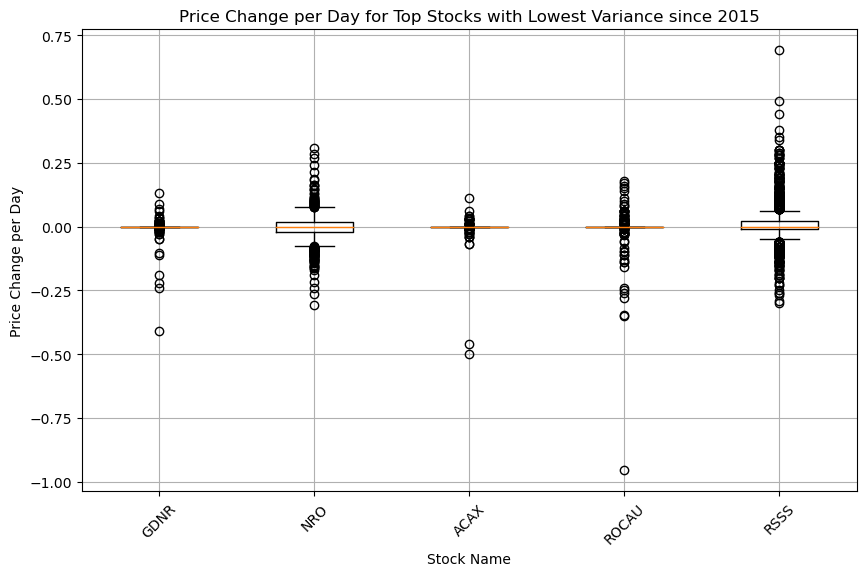

In [8]:
# Step 15: Get the names of the top stocks with the lowest variance
top_stocks_lowest_std = ranked_stats_summary_df.head(5)['Stock Name'].tolist()

# Step 16: Create box plots for the top stocks with the lowest std
plt.figure(figsize=(10, 6))
plt.boxplot([stocksmerged_df[stocksmerged_df['Stock Name'] == stock]['Price Change per Day'] for stock in top_stocks_lowest_std], labels=top_stocks_lowest_std)
plt.xlabel('Stock Name')
plt.ylabel('Price Change per Day')
plt.title('Price Change per Day for Top Stocks with Lowest Variance since 2015')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Final Summary to choose Stocks

In [9]:
# Step 17: Merge Price_change_df with stats_summary_df on 'Stock Name'
merged_df = pd.merge(Price_change_df, stats_summary_df, on='Stock Name')

# Step 18: Sort the merged DataFrame based on percentage change and std
merged_df = merged_df.sort_values(by=['Percentage Change', 'std'], ascending=[False, True])

# Reset the index of the result DataFrame
merged_df.reset_index(drop=True, inplace=True)

# Step 19: Display the combined DataFrame with ranking
print(merged_df)

   Stock Name  Percentage Change        mean    median           var  \
0        AGYS         462.338754    0.017410  0.000000  7.768532e-01   
1        REXR         311.610919    0.008385  0.027415  3.672571e-01   
2         ACN         273.575198    0.094471  0.140935  7.043445e+00   
3         MTH         223.348429   -0.006638  0.019953  2.427195e+00   
4         ADC         193.910641   -0.002721  0.025314  5.394025e-01   
5         RIO         156.147239    0.019056  0.008231  2.586586e-01   
6        NEWT         134.073412   -0.011185  0.000000  9.223179e-02   
7        RSSS         131.111109    0.009408  0.000000  4.907514e-03   
8           G         113.997628    0.001409  0.009917  2.006560e-01   
9         ADX          86.845226    0.001571  0.006905  1.210884e-02   
10        OBT          82.798635    0.010050  0.000000  2.358802e-01   
11       NARI          46.389090   -0.052249  0.090000  6.758952e+00   
12         AL          27.280276   -0.017082  0.013911  4.852462